
AİRLİNE DATASET
---



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


##  Veri Seti Seçimi ve Tanımı

Bu proje kapsamında müşteri memnuniyeti analizi gerçekleştirmek amacıyla **Airline Passenger Satisfaction** veri seti seçilmiştir. Bu veri seti, bir havayolu şirketinin sunduğu hizmetlere yönelik yolcu değerlendirmelerini içermektedir. Amaç, müşterilerin memnuniyet durumlarını etkileyen faktörleri istatistiksel olarak analiz etmektir.

### Bu veri setini seçme nedenlerim:
- Eksik değer içermesi, kategori çeşitliliği olması, yeterli veri olması.
-  Hem sayısal hem de kategorik değişkenler içeriyor.
- Gerçek dünya verisine yakın bir yapıya sahip olması

In [2]:
airline = pd.read_csv("/content/train.csv")


In [3]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
airline.shape

(103904, 25)

In [5]:
# airline dataset column names
airline.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
airline.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


###  Veri Setinin Genel Özellikleri

- Toplam Satır Sayısı: 103,904
- Toplam Sütun Sayısı: 25
- Target(hedef) Değişken: satisfaction (neutral or dissatisfied /satisfied)

Veri setinde yolcuların cinsiyeti, müşteri tipi, seyahat türü, sınıfı, uçuş mesafesi gibi bilgiler yer almaktadır. Ayrıca yolculuk sırasında aldıkları çeşitli hizmetlere dair memnuniyet durumları da bulunmaktadır.


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Veri setinde bulunan Unnamed: 0 sütunu, orijinal CSV dosyasından gelen bir indeks kolonudur ve analitik açıdan bir anlam ifade etmemektedir. Bu nedenle analizlere dahil edilmemiştir.


In [8]:
airline_df = airline.drop(columns=['Unnamed: 0'])


## `satisfaction`  Sütununun Sayısal Hale Getirilmesi
Veri setindeki satisfaction sütunu metin (kategorik) formatında olduğu için sayısal analizlerde (örneğin korelasyon hesaplama, grafik çizimi, ortalama alma gibi) doğrudan kullanılamaz.

Bu yüzden, bu sütun sayısal bir forma dönüştürülerek satisfaction_encoded adında yeni bir sütun oluşturulmuştur.
Dönüştürme şu şekilde yapılmıştır:

satisfied → 1 / neutral or dissatisfied → 0

Bu dönüşüm sayesinde:

- Memnuniyet düzeyi artık sayısal olarak analiz edilebilir.

- Diğer sayısal değişkenlerle olan ilişkisi incelenebilir.

- Ortalama memnuniyet oranı gibi yorumlar yapılabilir.

- Görselleştirmelerde rahatça kullanılabilir.

In [9]:
# satisfaction encodeed binary (0-1)
# neutral or dissatisfied -> 0 satisfied -> 1
airline_df['satisfaction_encoded'] = airline_df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})


In [10]:
airline_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_encoded
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0


###  Kategorik ve  Sayısal Değişkenler

- Kategorik Değişkenler (5):
  - Gender
  - Customer Type
  - Type of Travel
  - Class
  - satisfaction

- Sayısal Değişkenler (20):
  - id, Age, Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location, Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,	Leg room service,Baggage handling,Checkin service,Inflight service,	Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded



In [11]:
#split airline dataset as numeric and categorical
numeric_cols = airline_df.dtypes[airline_df.dtypes != 'object'].index.tolist()
categorical_cols = airline_df.dtypes[airline_df.dtypes == 'object'].index.tolist()

airline_numeric = airline_df[numeric_cols]
airline_categorical = airline_df[categorical_cols]

In [12]:
airline_numeric.dtypes

,0
id,int64
Age,int64
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64
Ease of Online booking,int64
Gate location,int64
Food and drink,int64
Online boarding,int64
Seat comfort,int64


In [13]:
airline_categorical.dtypes

,0
Gender,object
Customer Type,object
Type of Travel,object
Class,object
satisfaction,object


# İstatiksel Analiz



Veri setindeki sayısal değişkenler için temel istatistiksel özetler çıkarılmış ve bu değişkenlerin dağılımı gösterilmiştir.

In [14]:
airline_data = airline_numeric.describe().T

In [15]:
airline_data

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [16]:
airline_data["median"] = airline_numeric.median()
airline_data["variance"] = airline_numeric.var()

Sayısal özetler, her bir değişkenin dağılımı hakkında genel bir fikir verir. Özellikle ortalama (mean) ve medyan (median) gibi ölçüler, dağılımın simetrik mi yoksa çarpık mı olduğunu anlamamıza yardımcı olur. Bu sayede, hangi hizmetlerin iyileştirmeye açık olduğu daha net bir şekilde ortaya konabilir.

In [17]:
airline_data

,count,mean,std,min,25%,50%,75%,max,median,variance
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0,64856.5,1.403537e+09
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0,40.0,2.284621e+02
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0,843.0,9.943027e+05
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0,3.0,1.763131e+00
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0,3.0,2.325854e+00
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0,3.0,1.957004e+00
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0,3.0,1.632315e+00
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0,3.0,1.767657e+00
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0,3.0,1.821174e+00
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0,4.0,1.739992e+00


Veri setindeki bazı sütunlar (örneğin `Inflight wifi service`, `Seat comfort`, `Cleanliness`) yolcuların çeşitli hizmetlere verdiği memnuniyet puanlarını içermektedir.

Bu değişkenlerdeki skorlar **0 ile 5 arasında** sınırlıdır ve muhtemelen sabit bir **anket ölçeği** kullanılarak elde edilmiştir. Aşağıda tipik bir puanlama sisteminin örneği verilmiştir:

| Puan | Anlamı                 |
|------|------------------------|
| 0    | Çok kötü               |
| 1    | Kötü                   |
| 2    | Orta altı              |
| 3    | Orta / Nötr            |
| 4    | İyi                    |
| 5    | Çok iyi / Mükemmel     |

Bu tür sabit aralıklı puanlamalar, dağılımların yorumlanmasında oldukça yardımcı olur. Örneğin bir değişkende medyan skorun 3 olması, yolcuların çoğunlukla **nötr veya ortalama memnuniyet** bildirdiğini gösterir.



### Satisfaction (Memnuniyet)
- satisfaction_encoded sütununa göre, veri setindeki yolcuların yaklaşık %43'ü uçuşlarından memnun, %57'si ise memnun değildir.

- Medyan değerin 0 olması, memnun olmayan yolcu sayısının memnun olanlardan fazla olduğunu gösterir.

- Standart sapmanın ≈ 0.5 olması, değişkenin dengeli bir dağılıma sahip olduğunu fakat hafif dengesiz olduğunu da ima eder.

### Age (Yaş)
- Ortalama yaş 39.3, medyan ise 40 olup birbirine çok yakındır. Bu da dağılımın büyük oranda simetrik olduğunu gösterir.
- En küçük yaş 7, en büyük yaş 85 olarak gözlemlenmiştir.

### Flight Distance (Uçuş Mesafesi)
- Ortalama flight distance 1189 km, medyan ise 843 km. Ortalama, medyandan oldukça yüksek olduğu için dağılım sağa çarpık olabilir.
- Maksimum değer 4983 km, minimum ise 31 km dir.

###  Inflight Wifi Service (Uçak İçi Wi-Fi Hizmeti)
- Ortalama skor 2.7, medyan skor ise 3. Bu, kullanıcıların bu hizmetten genel olarak orta düzeyde memnun olduğunu gösterir.
- Dağılımın 0–5 arasında olması, puanlamanın sabit aralıklarla yapıldığını gösterir.

###  Baggage Handling (Bagaj Hizmeti)
- Ortalama skor 3.0, medyan 3, standart sapma düşük. Bu, hizmetin genel olarak dengeli ve ortalama seviyede verildiğini gösterir.


###  Cleanliness (Temizlik)
- Ortalama ve medyan puan 3.1 civarında. Temizlik algısı genel olarak ortalamanın biraz üstünde değerlendirilmiştir.

### Arrival Delay in Minutes (Varış Gecikmesi - Dakika)

Bu değişken, uçuşların varışta ne kadar geciktiğini dakika cinsinden göstermektedir.

- Medyan değerin 0 dakika olması, uçuşların çoğunda hiç gecikme yaşanmadığını gösterir.
- Ortalama 15.18 dakika, yani bazı uçuşlarda ciddi gecikmeler yaşanmış ve bu ortalamayı yukarı çekmiştir.
- Standart sapmanın yüksek (38.7) olması, gecikme sürelerinin oldukça değişken olduğunu gösterir.
- En yüksek gecikme süresi 1584 dakika (yaklaşık 26 saat) ile ciddi bir aykırı değer olduğunu göstermektedir.
- Gecikme sürelerinin büyük bölümü 0 ile 13 dakika arasında yoğunlaşmaktadır.

Bu dağılım, veri setinin bu değişken açısından sağa çarpık (right-skewed) olduğunu ortaya koymaktadır.


---

###  Genel Gözlemler:
- Çoğu hizmet puanı 0–5 aralığında olup, memnuniyet düzeyleri bu sayede sayısallaştırılmıştır.
- Flight Distance gibi sürekli değişkenler daha büyük varyans gösterirken, servis puanları daha dar bir aralıkta dağılmıştır.
- Dağılım, bazı değişkenlerde simetrikken bazılarında çarpıklık (skewness) sinyalleri vermektedir.
- satisfaction_encoded sütunu sayesinde memnuniyet artık sayısal olarak analiz edilebilir hâle getirilmiştir.
- Ortalama memnuniyet oranı %43 seviyesindedir, bu da müşteri deneyiminde genel olarak iyileştirme yapılması gerektiğini düşündürmektedir.
- Medyanın 0 olması memnuniyetsizliğin baskın olduğunu göstermektedir.




# EKSİK DEĞER ANALİZİ

In [18]:
# number of missing values in every column
missing_summary = airline_df.isnull().sum()

In [19]:
missing_summary

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


<Axes: >

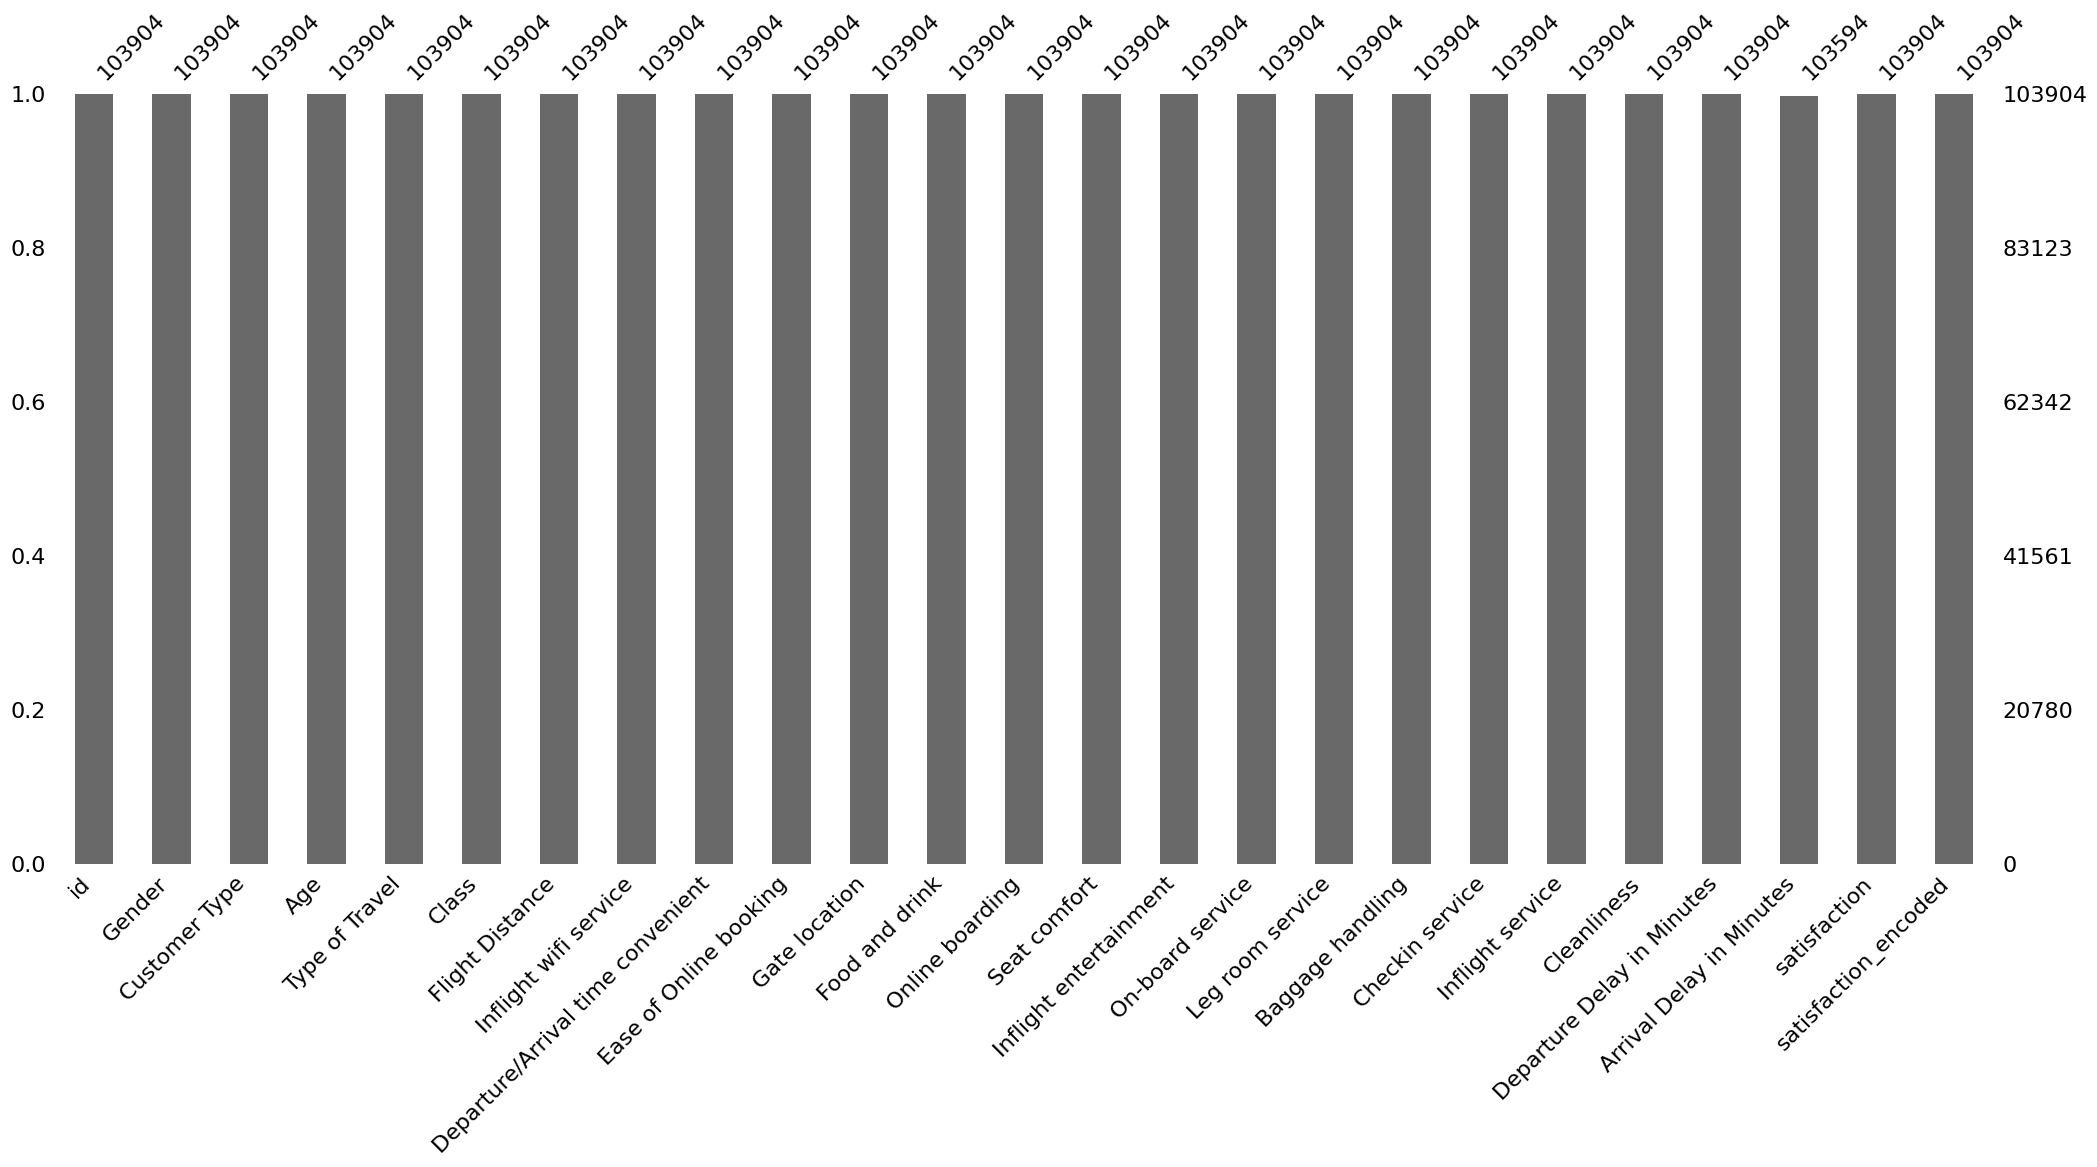

In [23]:
msno.bar(airline_df)

<Axes: >

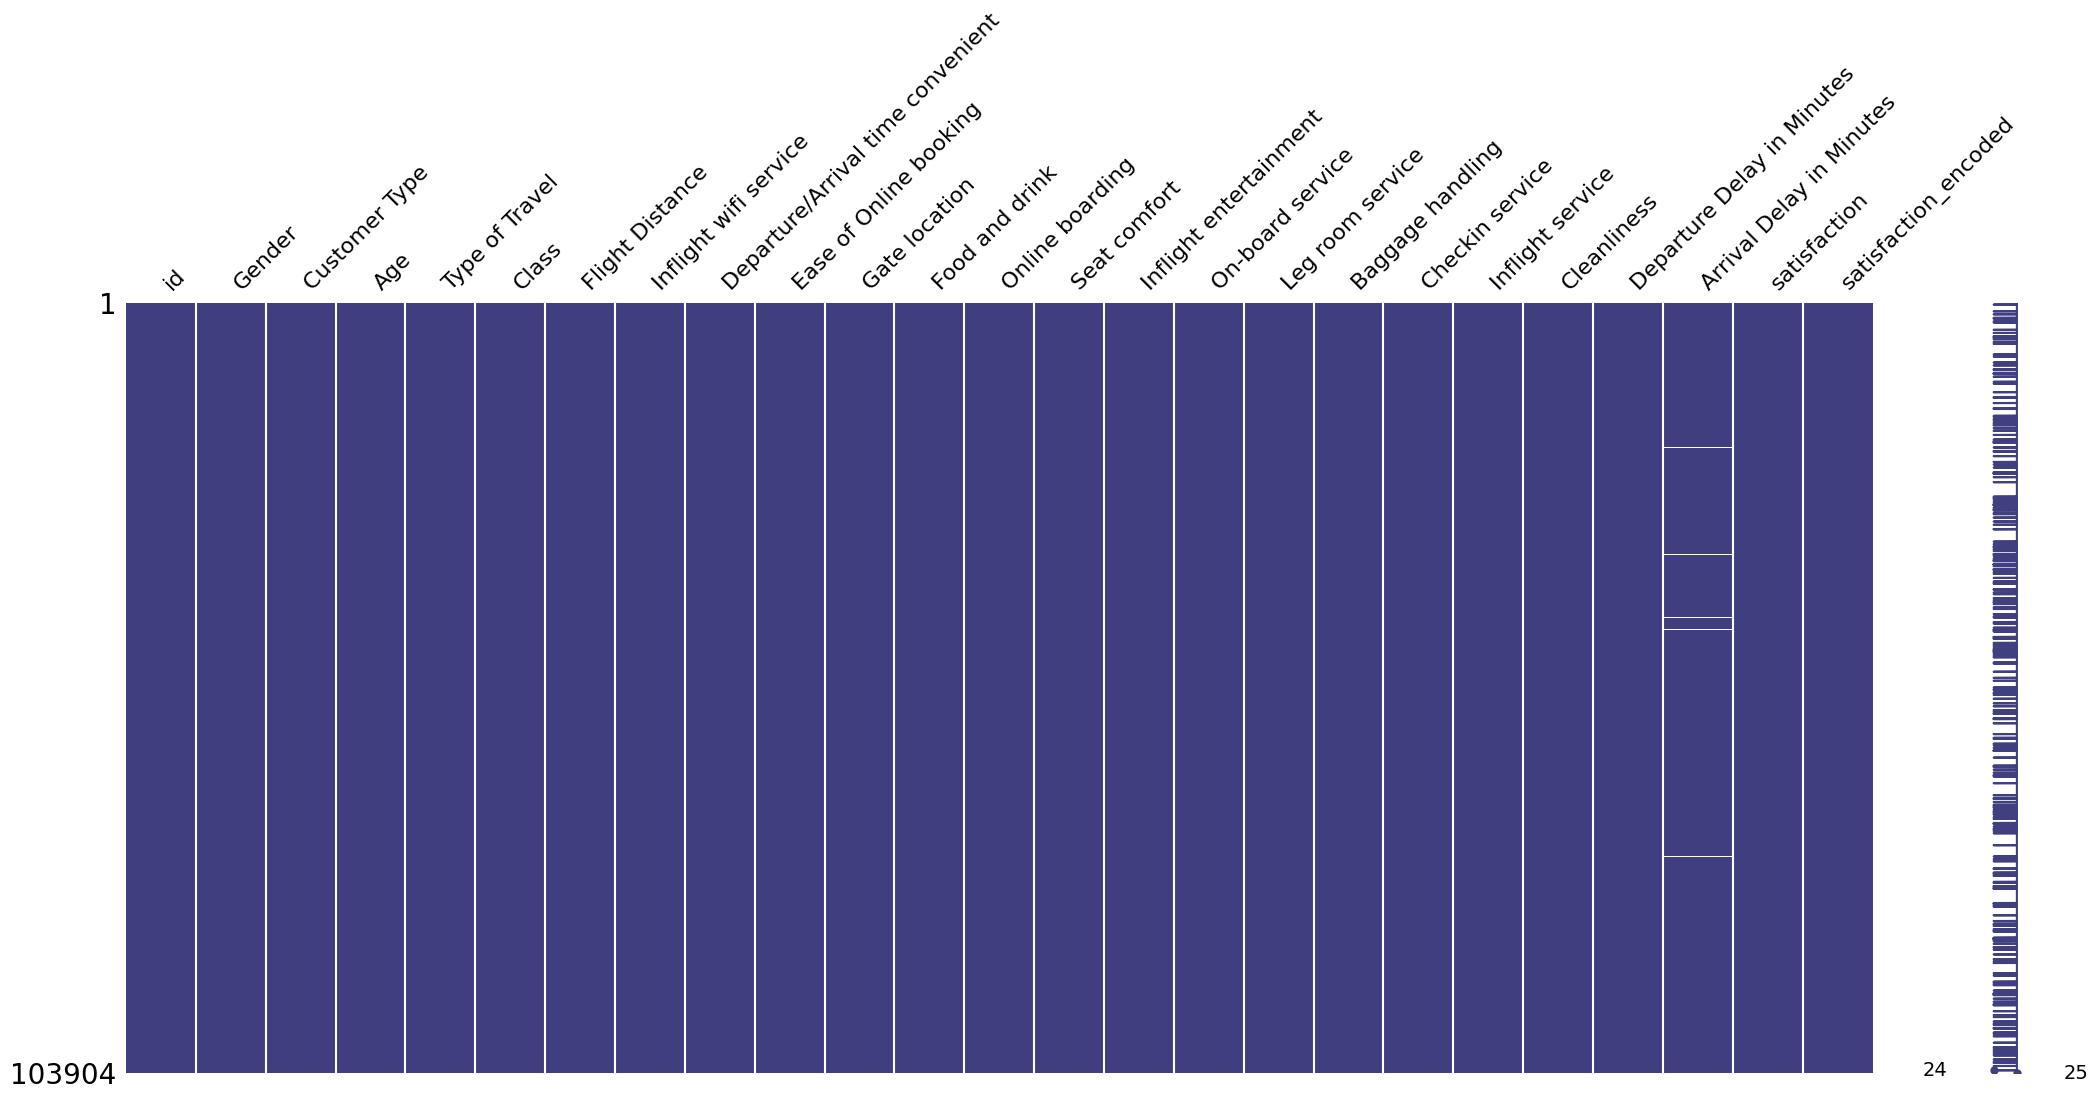

In [24]:
msno.matrix(airline_df,color=(0.25, 0.25, 0.50))

"Arrival Delay in Minutes" değişkeninde 310 eksik değer bulunmakta ve bu değerler, veri setinin %0.3'ünü oluşturmaktadır. Görselde eksik verinin yalnızca bu değişkende yoğunlaştığı açıkça görülmektedir.


In [21]:
# filtered missing value column
missing_summary = missing_summary[missing_summary > 0]

In [22]:
missing_summary

,0
Arrival Delay in Minutes,310


In [25]:
# percentage of missing values
missing_percent = (missing_summary / len(airline_df)) * 100

In [26]:
missing_percent.round(2)

,0
Arrival Delay in Minutes,0.3


### Eksik Verileri Ele Alma Stratejileri

`Arrival Delay in Minutes` sütununda 310 eksik değer bulunmaktadır. Bu, veri setinin yalnızca %0.3’üne karşılık gelmektedir. Eksik değerleri ele almak için aşağıdaki stratejiler değerlendirilebilir:

1. **Satır Silme:**  
   Eksik değeri bulunan 310 satır, veri setinin çok küçük bir kısmı olduğu için analizden tamamen çıkarılabilir.  
   -  Avantaj: Uygulaması kolay ve hızlıdır.  
   -  Dezavantaj: Az da olsa veri kaybı oluşur; özellikle küçük veri setlerinde önerilmez.

2. **Ortalama ile Doldurma:**  
   Sayısal bir değişken olduğu için eksik değerler ortalama ile doldurulabilir.  
   -  Avantaj: Tüm veriler korunur.  
   - Dezavantaj: Dağılım çarpık olduğunda, ortalama uç değerlerden etkilendiği için yanıltıcı olabilir.

3. **Medyan ile Doldurma:**  
   Medyan, ortanca değeri temsil eder ve uç değerlerden etkilenmez.  
   -  Avantaj: Aykırı değerlerin olduğu çarpık dağılımlarda daha güvenilirdir.  
   -  Dezavantaj: Verinin doğal varyasyonunu biraz bastırabilir, ancak bu genellikle ihmal edilebilir düzeydedir.

 **Sonuç:**  
Veri setindeki `Arrival Delay in Minutes` değişkeni sağa çarpık bir dağılıma sahiptir. Medyan değerin 0 olması ve maksimum gecikmenin 1584 dakika gibi uç bir değer olması, **ortalama ile doldurma yaklaşımını riskli hale getirmektedir**. Bu nedenle, bu proje kapsamında eksik değerler **medyan ile doldurulmuştur**.



In [27]:
# Arrival Delay in Minutes missign values filled median
median_val = airline_df["Arrival Delay in Minutes"].median()
airline_df["Arrival Delay in Minutes"].fillna(median_val, inplace=True)

/tmp/ipython-input-27-168076277.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline_df["Arrival Delay in Minutes"].fillna(median_val, inplace=True)


In [28]:
print(airline_df["Arrival Delay in Minutes"].isnull().sum())

0


## Aykırı Değer (Outlier) Analizi

Aykırı değerler, genel dağılımdan ciddi şekilde sapmış gözlemlerdir.

Aykırı değerler, her bir sayısal değişken için IQR (Interquartile Range)*yöntemi ile tespit edilmiştir:

- **Q1 (1. Çeyrek):** Verinin alt %25'lik dilimi
- **Q3 (3. Çeyrek):** Verinin üst %25'lik dilimi
- **IQR:** Q3 - Q1
- **Alt Sınır:** Q1 - 1.5 * IQR
- **Üst Sınır:** Q3 + 1.5 * IQR

Bu sınırların dışındaki tüm gözlemler **aykırı** olarak kabul edilmiştir.

id sütunu her yolcuya özel, benzersiz bir numaradır. Bu sütun herhangi bir ölçüm ya da skor bilgisi içermez. Bu yüzden, sayısal görünse de anlamlı bir değer taşımaz ve aykırı değer analizi gibi işlemler için uygun değildir.

Bu nedenle id sütunu, outlier analizi yapılacak değişkenler arasına dahil edilmemiştir.



In [29]:
# numeric variable, excluded id
numeric_cols = [col for col in numeric_cols if col not in ['id']]

In [30]:
outlier_summary = []

# Detect outlier, using IQR method for each numerical variable
for col in numeric_cols:
    q1 = airline_df[col].quantile(0.25)
    q3 = airline_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # outlier number
    outliers = airline_df[(airline_df[col] < lower_bound) | (airline_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total = airline_df.shape[0]
    ratio = (outlier_count / total) * 100


    outlier_summary.append({
        "Değişken": col,
        "Aykırı Değer Sayısı": outlier_count,
        "Oran (%)": round(ratio, 2),
        "Alt Sınır": lower_bound,
        "Üst Sınır": upper_bound
    })

In [31]:
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Oran (%)", ascending=False)


In [32]:
outlier_df

,Değişken,Aykırı Değer Sayısı,Oran (%),Alt Sınır,Üst Sınır
16,Departure Delay in Minutes,14529,13.98,-18.0,30.0
17,Arrival Delay in Minutes,13954,13.43,-19.5,32.5
13,Checkin service,12891,12.41,1.5,5.5
1,Flight Distance,2291,2.20,-1579.5,3736.5
0,Age,0,0.00,-9.0,87.0
2,Inflight wifi service,0,0.00,-1.0,7.0
3,Departure/Arrival time convenient,0,0.00,-1.0,7.0
7,Online boarding,0,0.00,-1.0,7.0
4,Ease of Online booking,0,0.00,-1.0,7.0
5,Gate location,0,0.00,-1.0,7.0


### Boxplot ile Aykırı Değer Görselleştirmesi

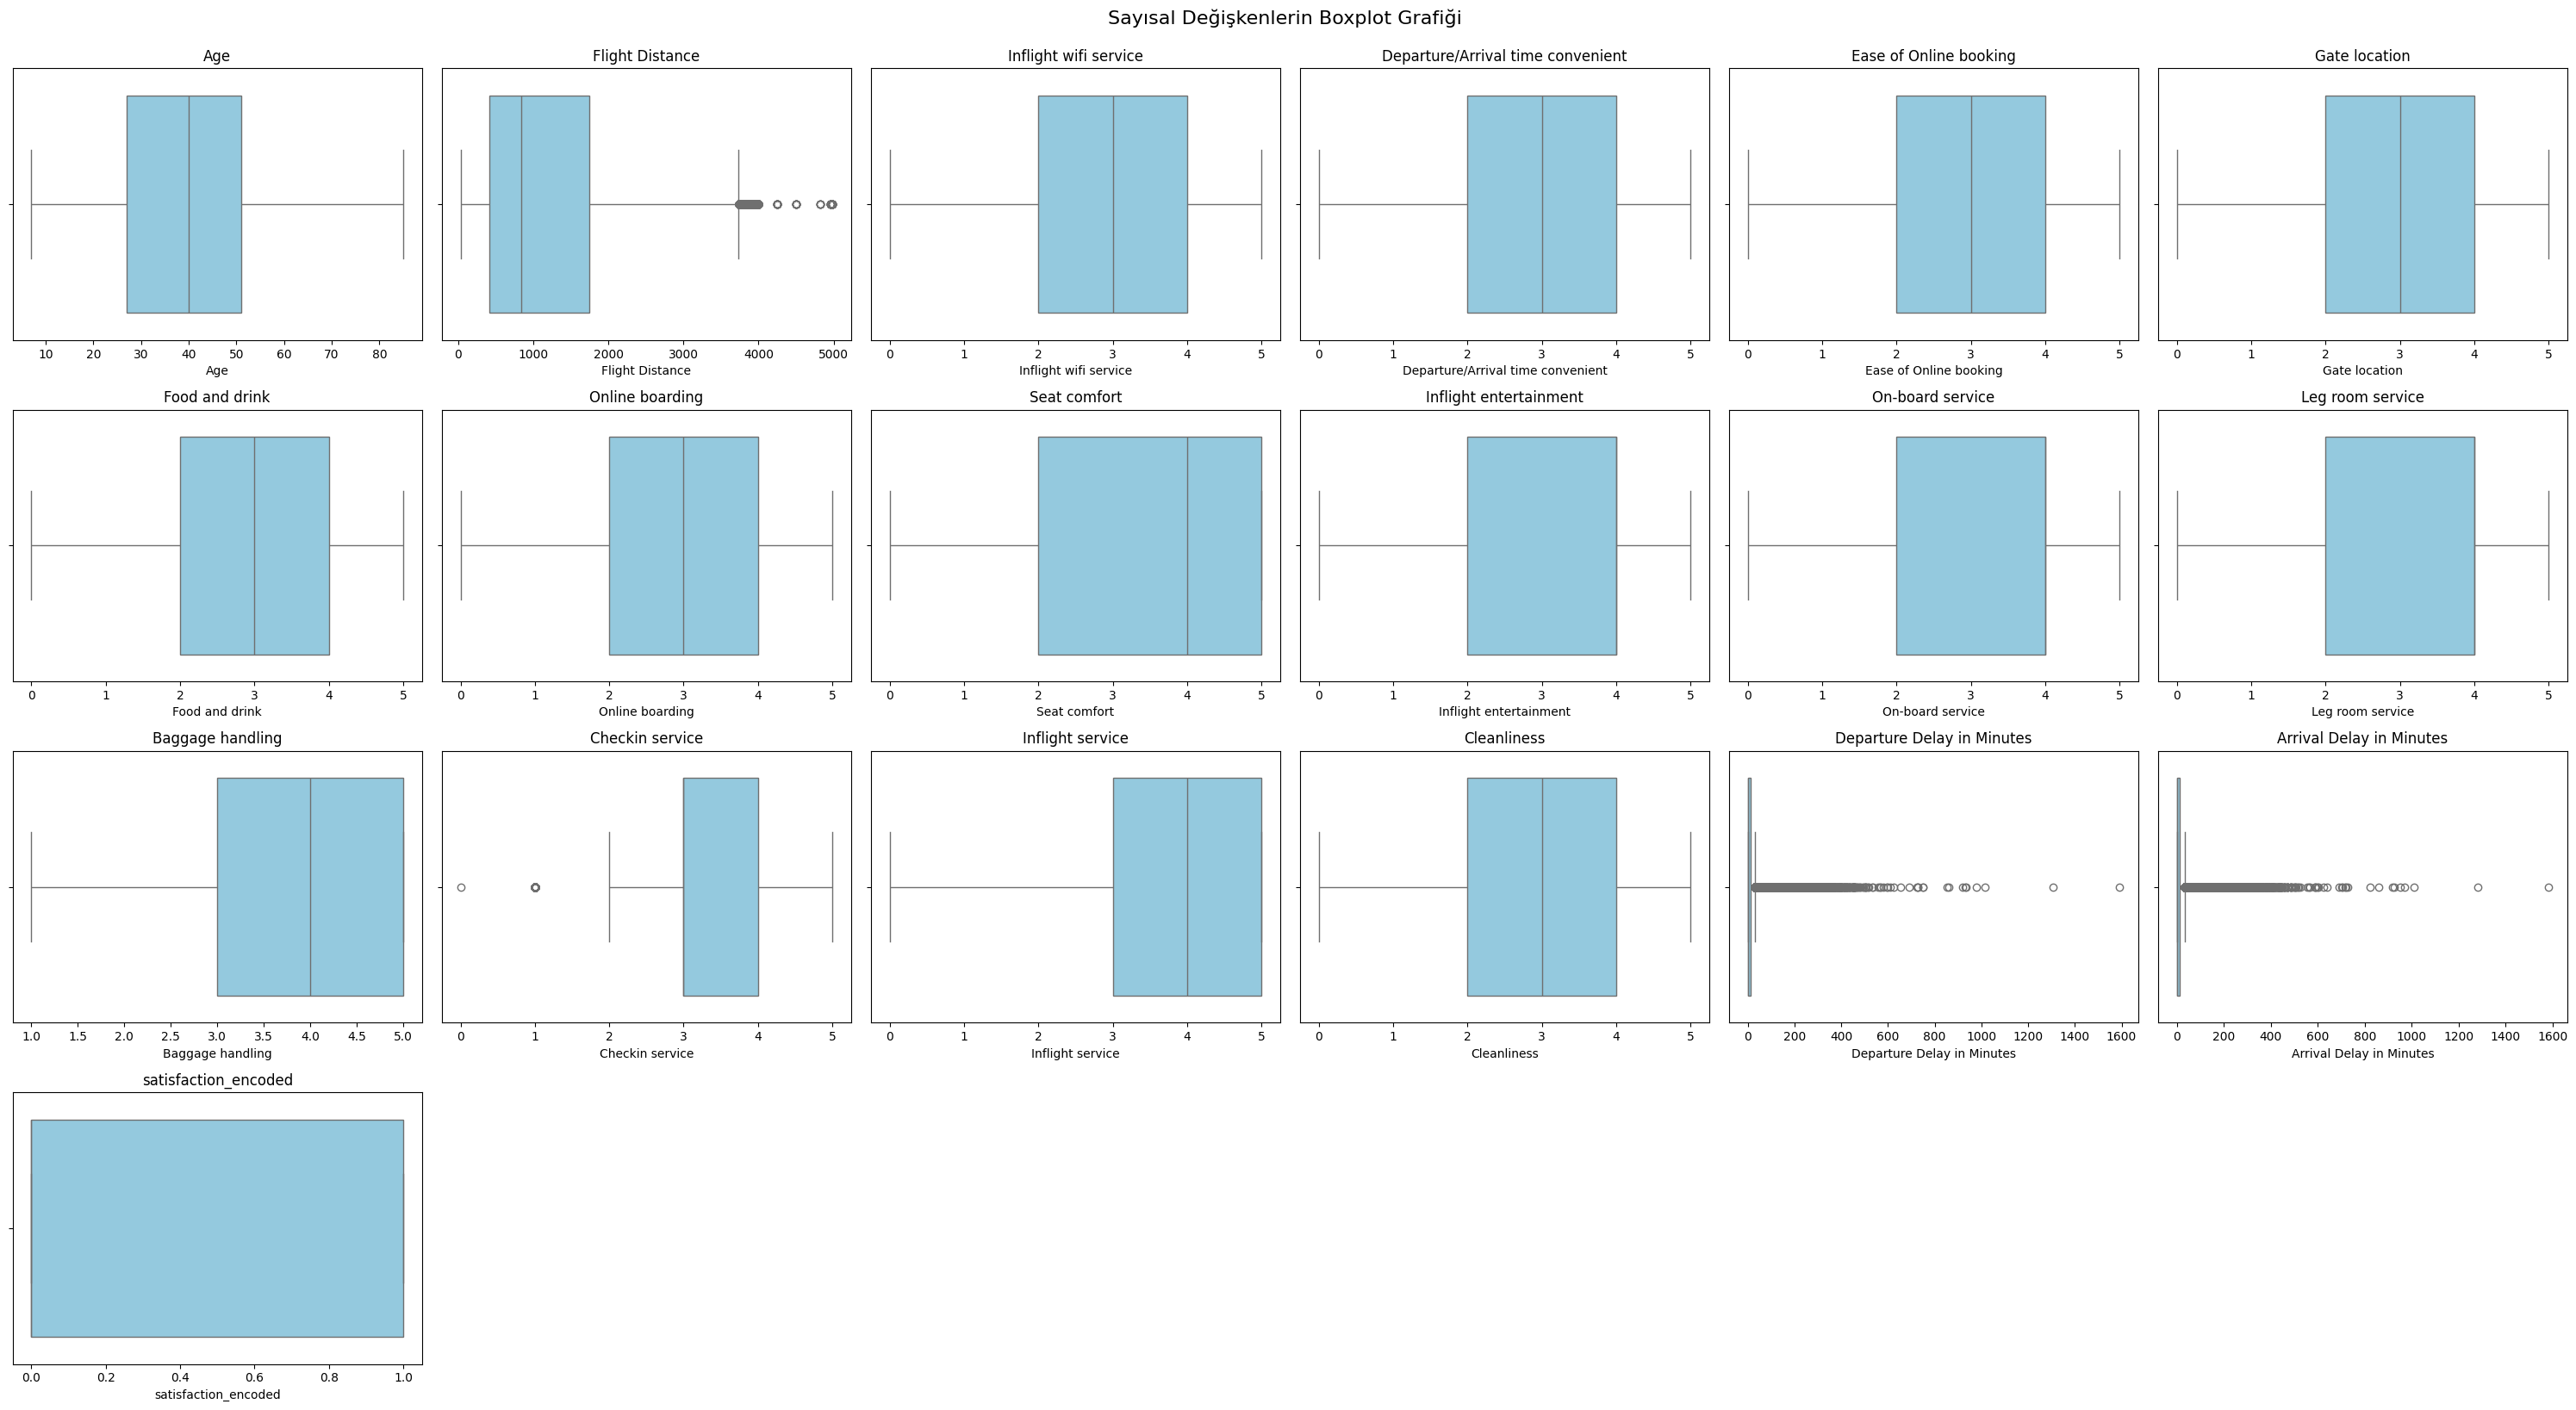

In [33]:
n_cols = 6
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))


for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=airline_df[col], color="skyblue")
    plt.title(col)
    plt.ylabel('')


plt.tight_layout()
plt.suptitle('Sayısal Değişkenlerin Boxplot Grafiği ', y=1.02, fontsize=16)
plt.show()



##  Outlier Analizi

Boxplot grafikleri üzerinden her sayısal değişkenin dağılımı ve aykırı değer durumu gösterilmiştir.

- **Flight Distance**, **Departure Delay** ve **Arrival Delay** değişkenlerinde gözle görülür miktarda aykırı değer bulunmaktadır. Bu değişkenler sağa çarpık bir dağılıma sahiptir. Uç değerler ortalamayı yükseltebilir.
- **Age** değişkeni simetrik bir dağılım gösterirken, hizmet puanlarının çoğu (örneğin `Inflight wifi service`, `Checkin service`) 2 ila 4 arasında yoğunlaşmaktadır.
- Bazı hizmetlerle ilgili değişkenlerde (örneğin `Checking service`, `On-board service`) sınırlı sayıda ya da hiç aykırı değer görülmemektedir.
- Genel olarak, hizmet puanları 0–5 aralığında olup sabit ölçekli anket verisi olarak dengeli dağılmış görünmektedir.


# GÖRSELLEŞTİRME

Kategorik değişkenler, bar chart kullanılarak görselleştirilmiştir.

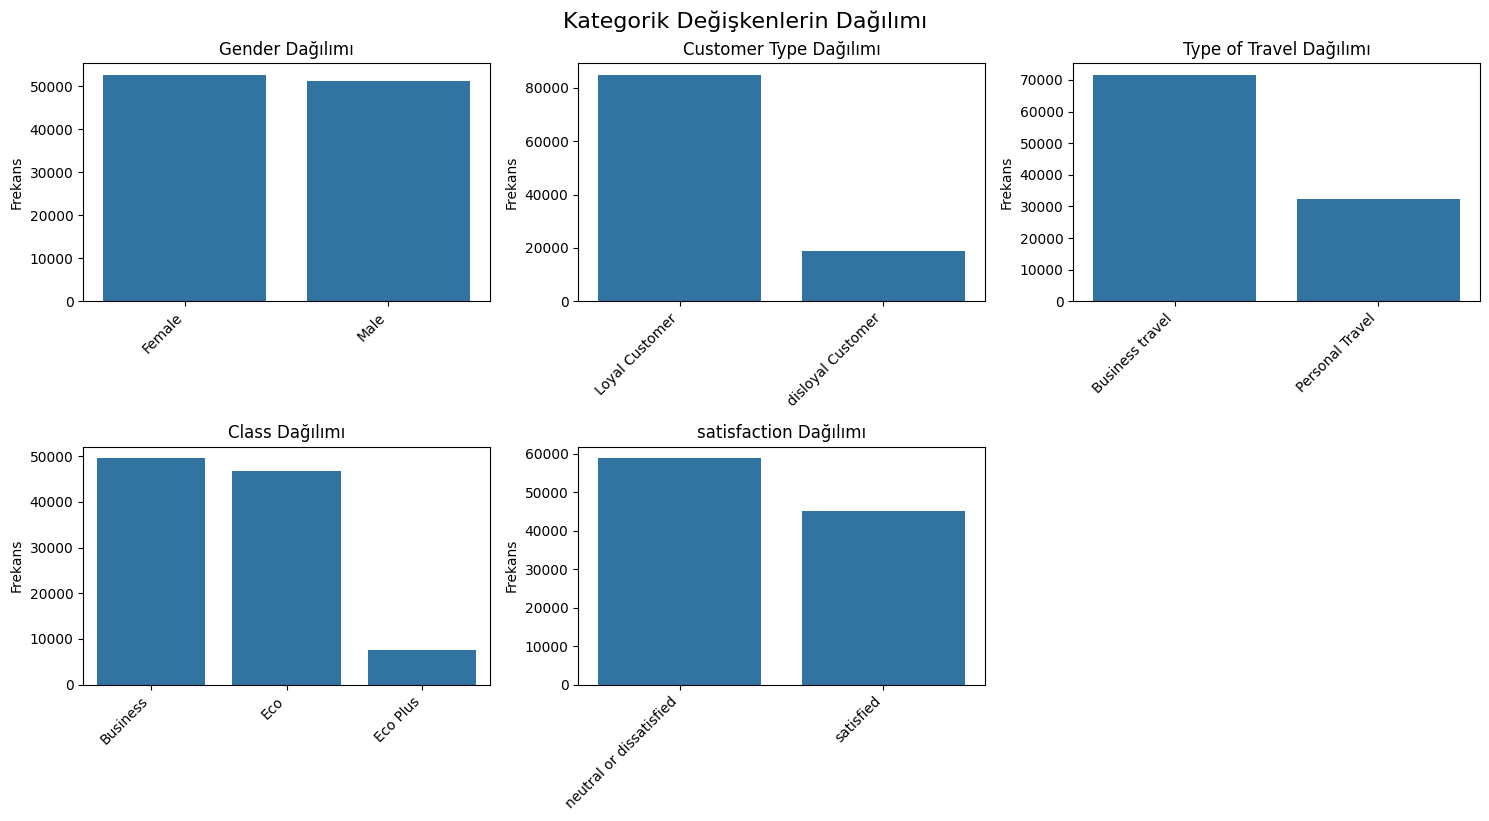

In [34]:
# --- Kategorik Değişkenler: Bar Chart ---
n_cat = len(categorical_cols)
n_cols_cat = 3
n_rows_cat = (n_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(5 * n_cols_cat, 4 * n_rows_cat))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(data=airline_df, x=col, order=airline_df[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{col} Dağılımı')
    plt.xlabel('')
    plt.ylabel('Frekans')
plt.tight_layout()
plt.suptitle('Kategorik Değişkenlerin Dağılımı', y=1.02, fontsize=16)
plt.show()




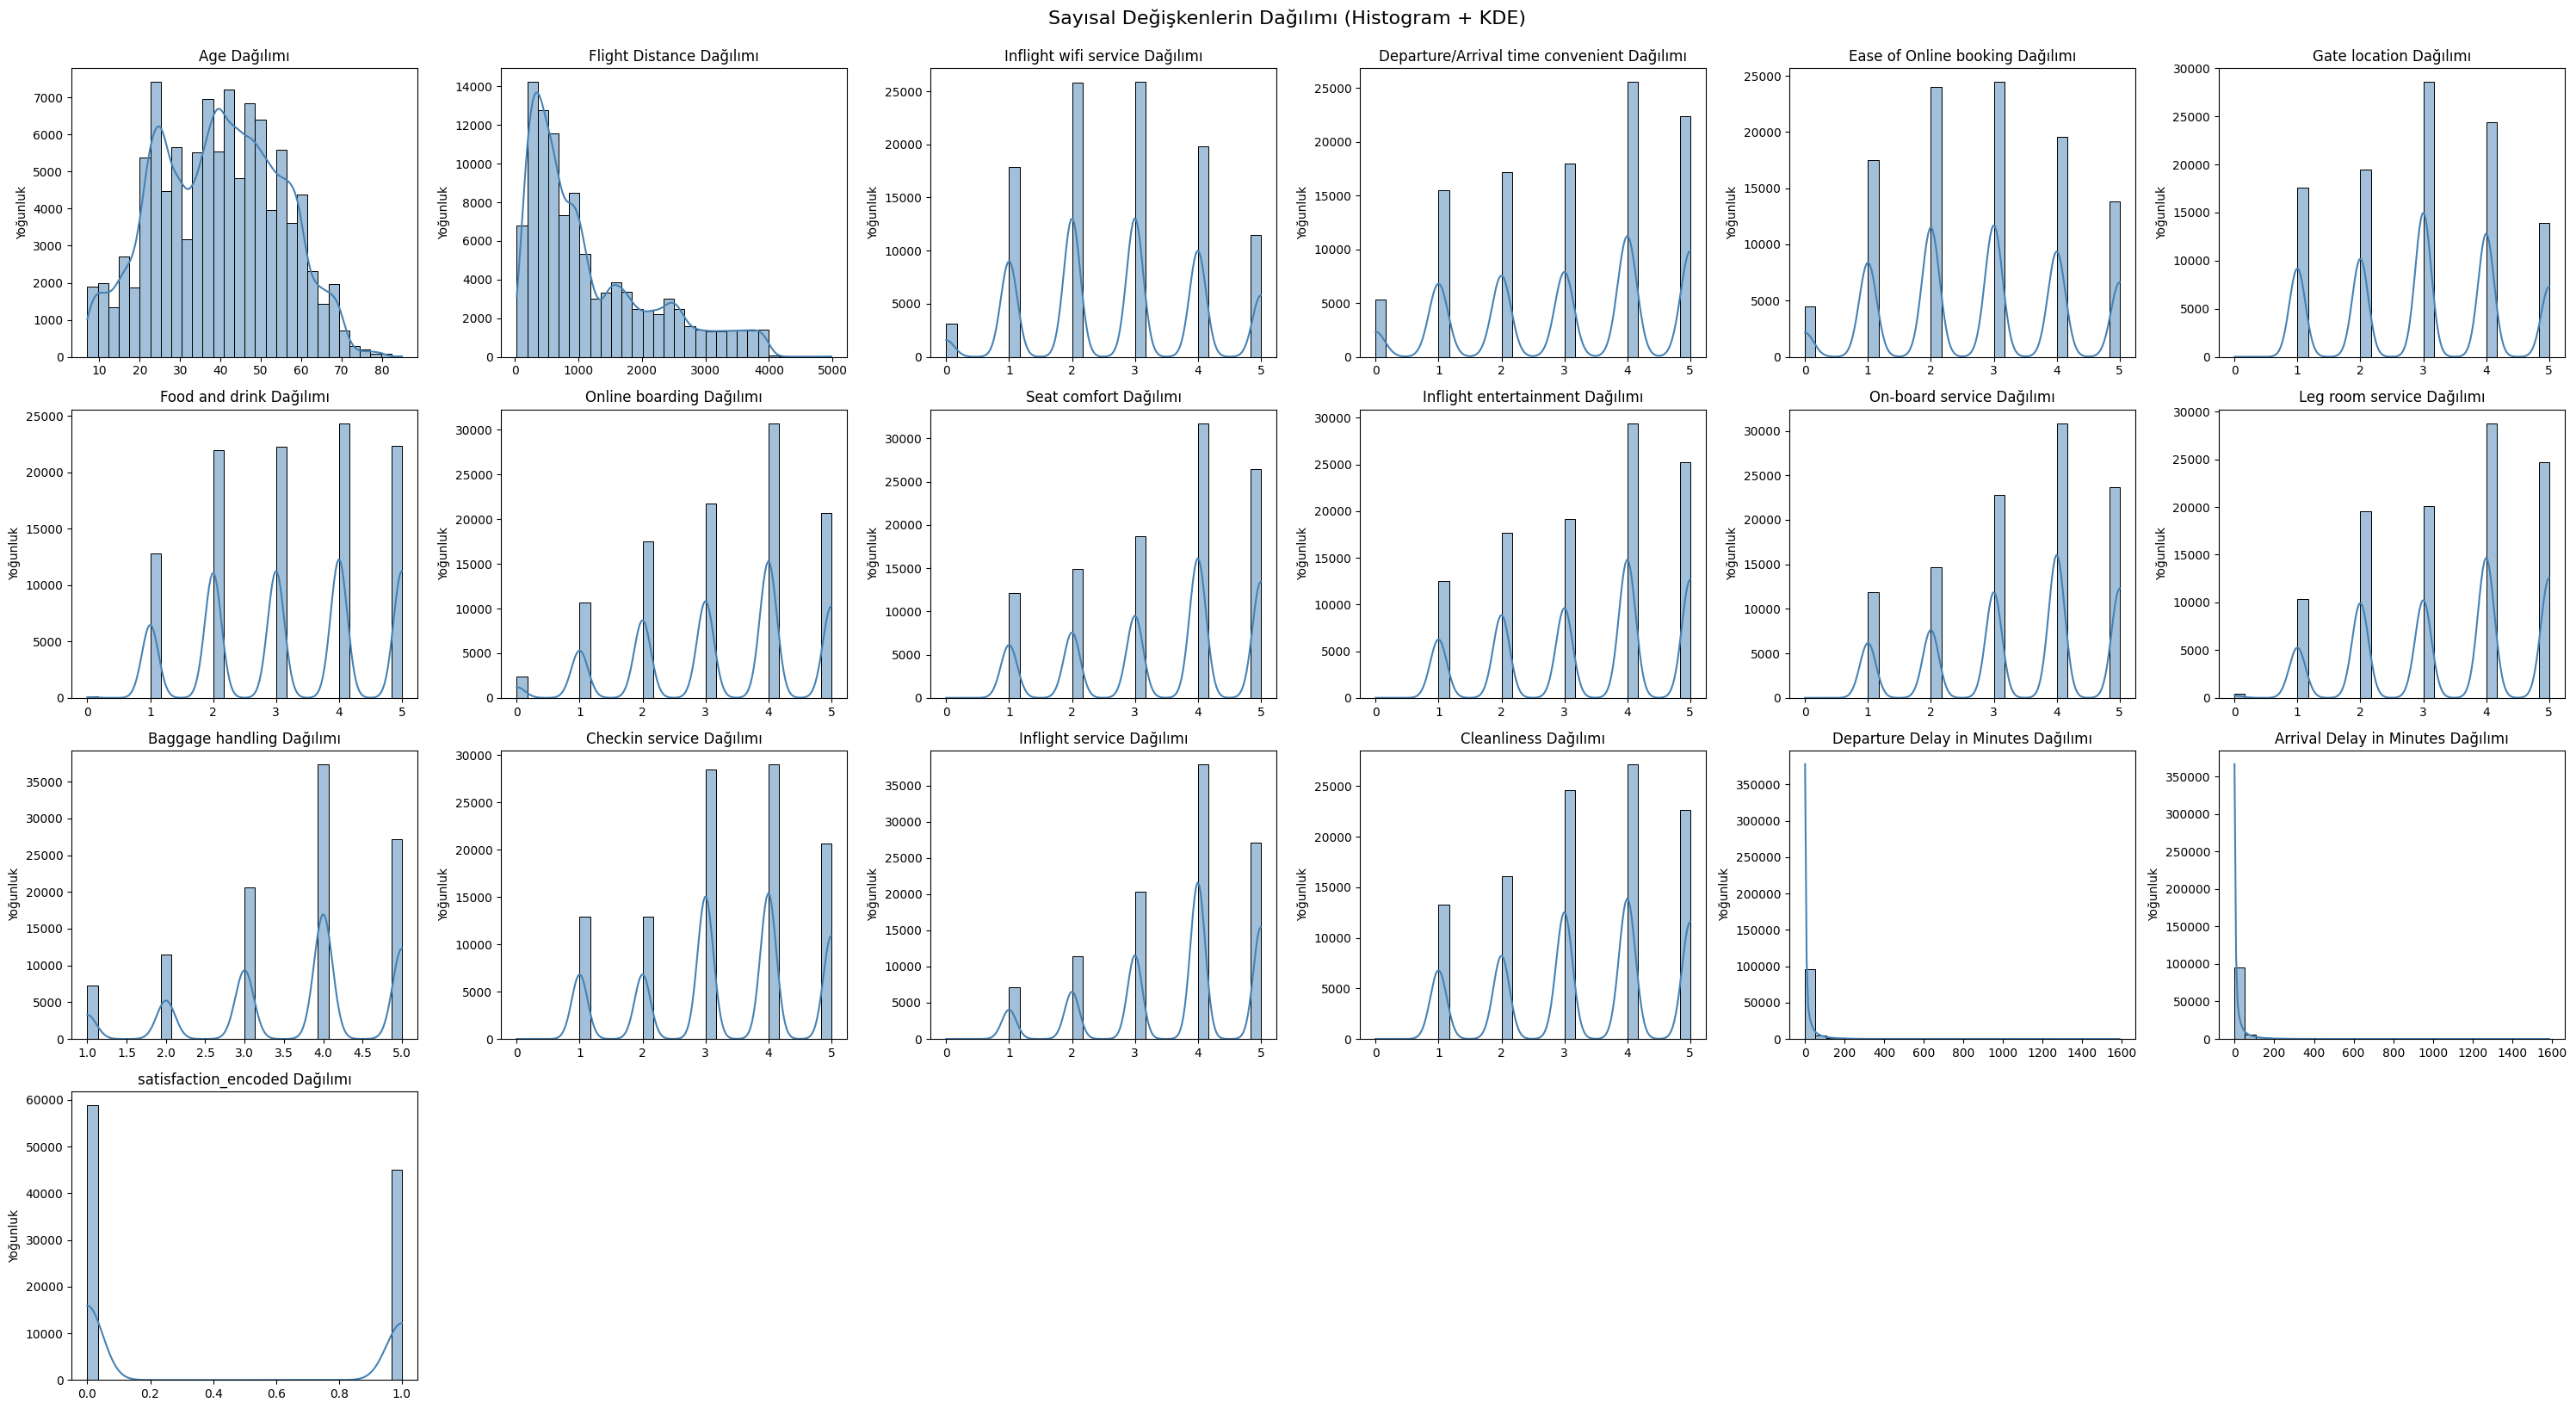

In [35]:
# --- Sayısal Değişkenler: Histogram + KDE ---
n_num = len(numeric_cols)
n_cols_num = 6
n_rows_num = (n_num + n_cols_num - 1) // n_cols_num

plt.figure(figsize=(5 * n_cols_num, 4 * n_rows_num))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    sns.histplot(data=airline_df, x=col, bins=30, kde=True, color='steelblue')
    plt.title(f'{col} Dağılımı')
    plt.xlabel('')
    plt.ylabel('Yoğunluk')
plt.tight_layout()
plt.suptitle('Sayısal Değişkenlerin Dağılımı (Histogram + KDE)', y=1.02, fontsize=16)
plt.show()


--- Sayısal ve Kategorik Değişkenler Arasındaki İlişkiler ---


/tmp/ipython-input-36-1422684541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Age', data=airline_df, palette='coolwarm')


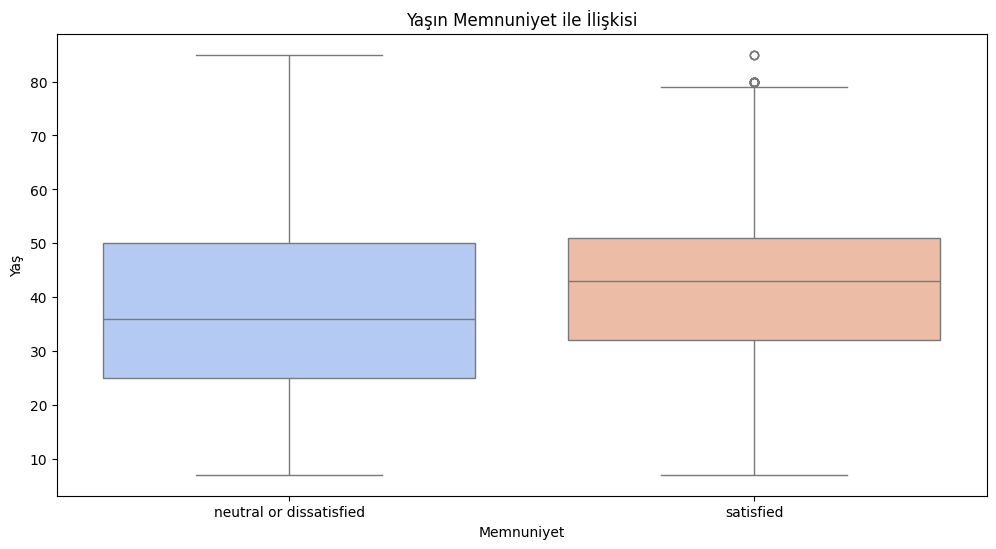

In [36]:
# --- Sayısal ve Kategorik Değişkenler Arasındaki İlişkiler ---
print("\n--- Sayısal ve Kategorik Değişkenler Arasındaki İlişkiler ---")

# Memnuniyet (satisfaction) kategorisine göre yaş dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction', y='Age', data=airline_df, palette='coolwarm')
plt.title('Yaşın Memnuniyet ile İlişkisi')
plt.xlabel('Memnuniyet')
plt.ylabel('Yaş')
plt.show()

Grafikte görüldüğü üzere, memnuniyet düzeyi arttıkça yaş ortalaması da artma eğilimindedir.

/tmp/ipython-input-37-2809221677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='satisfaction', y='Flight Distance', data=airline_df, palette='coolwarm')


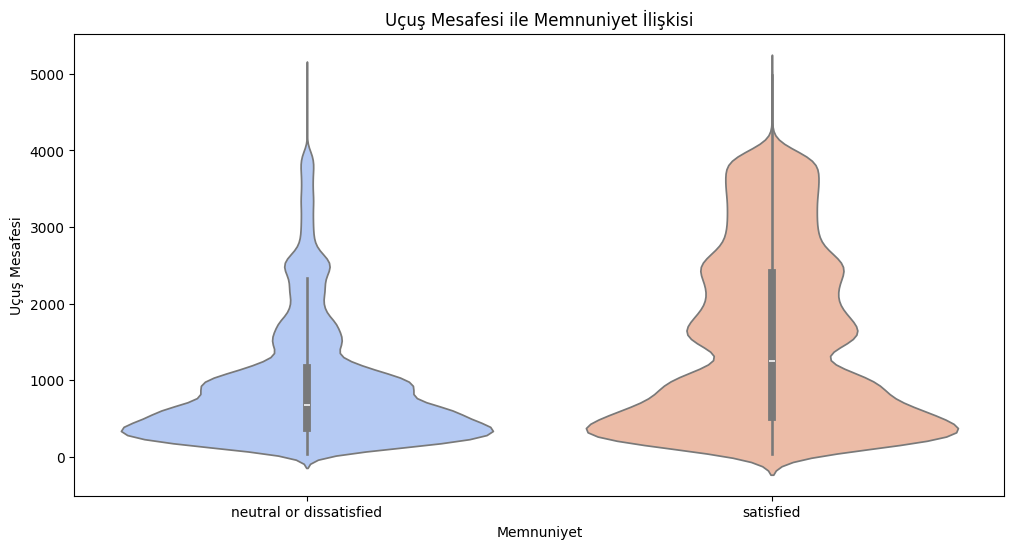

In [37]:

# Uçuş mesafesi ile memnuniyet ilişkisi
plt.figure(figsize=(12, 6))
sns.violinplot(x='satisfaction', y='Flight Distance', data=airline_df, palette='coolwarm')
plt.title('Uçuş Mesafesi ile Memnuniyet İlişkisi')
plt.xlabel('Memnuniyet')
plt.ylabel('Uçuş Mesafesi')
plt.show()

Memnun olan yolcuların uçuş mesafesi genellikle daha uzun. Bu, uzun mesafeli uçuşlarda hizmet kalitesinin veya beklentilerin daha iyi karşılandığını gösterebilir.

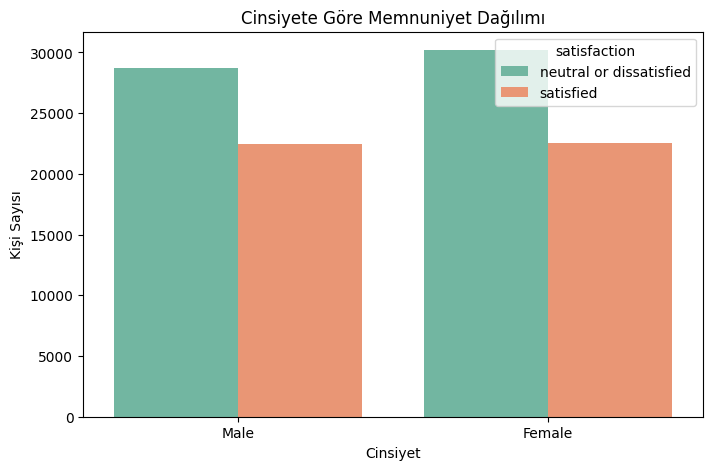

In [39]:
#Cinsiyet Memnuniyet İlişkisi
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='satisfaction', data=airline_df, palette='Set2')
plt.title('Cinsiyete Göre Memnuniyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.show()

Cinsiyete göre memnuniyet oranları benzer görünmekle birlikte, memnuniyetsizlik kadın yolcular arasında biraz daha fazladır.

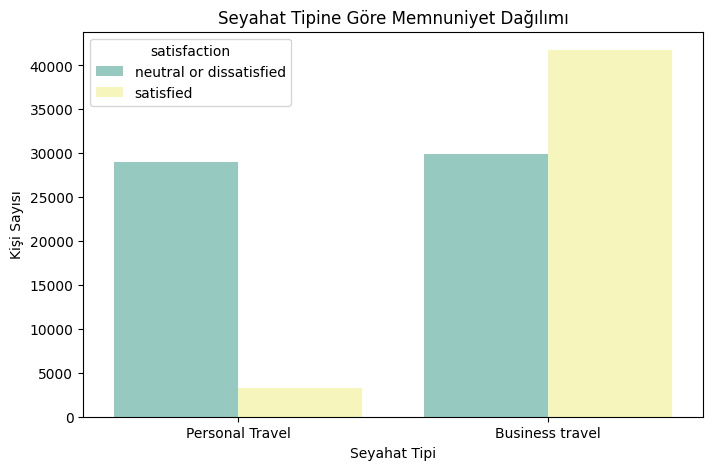

In [40]:
#---------Seyahat Tipi Memnuniyet İlişkisi
plt.figure(figsize=(8, 5))
sns.countplot(x='Type of Travel', hue='satisfaction', data=airline_df, palette='Set3')
plt.title('Seyahat Tipine Göre Memnuniyet Dağılımı')
plt.xlabel('Seyahat Tipi')
plt.ylabel('Kişi Sayısı')
plt.show()

İş amaçlı seyahat eden yolcular, kişisel seyahat edenlere göre çok daha yüksek memnuniyet göstermektedir.



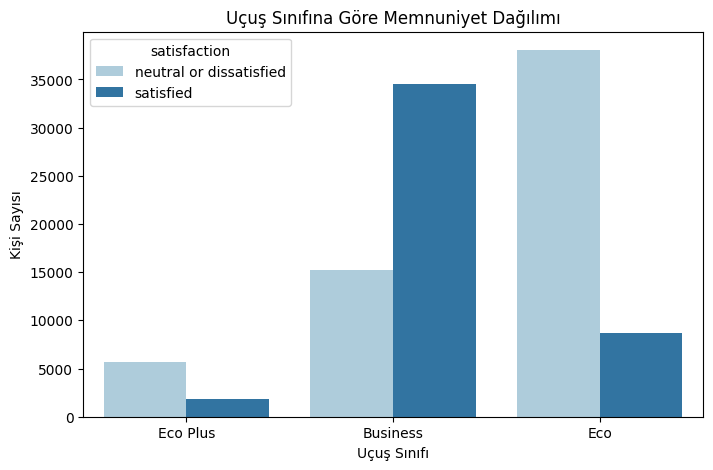

In [41]:
#---------Uçus sınıfı memnuniyet ilişkisi--------
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='satisfaction', data=airline_df, palette='Paired')
plt.title('Uçuş Sınıfına Göre Memnuniyet Dağılımı')
plt.xlabel('Uçuş Sınıfı')
plt.ylabel('Kişi Sayısı')
plt.show()


Business sınıfı yolcuların büyük kısmı memnunken, ekonomi sınıfında memnuniyetsizlik daha yaygındır.

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


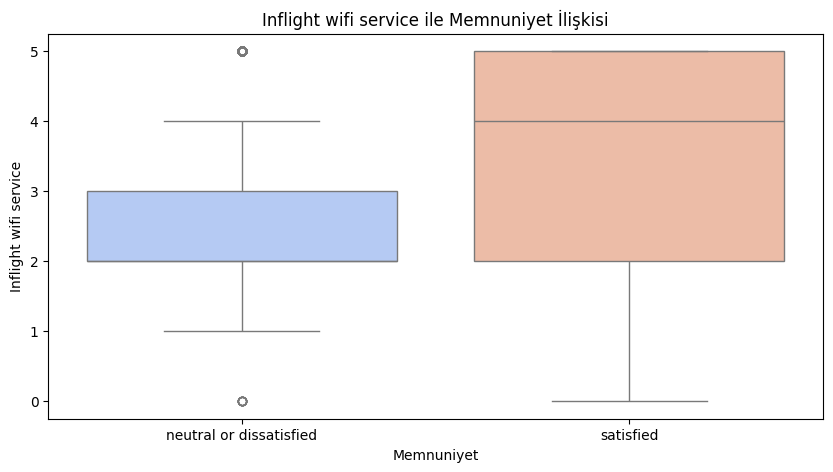

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


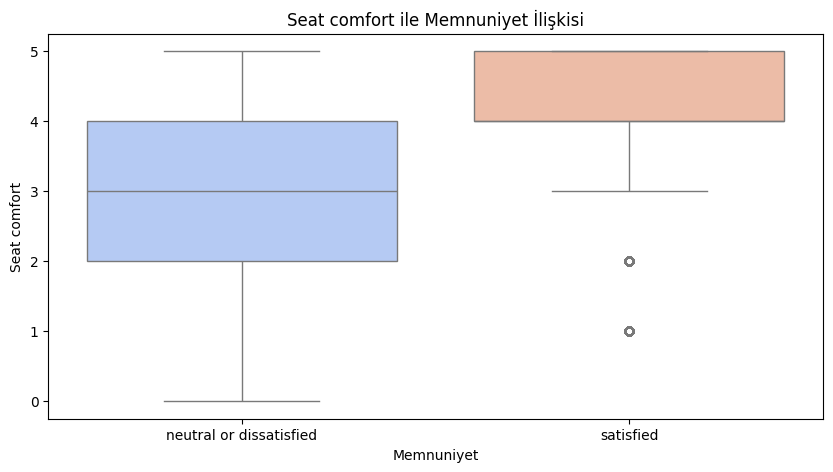

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


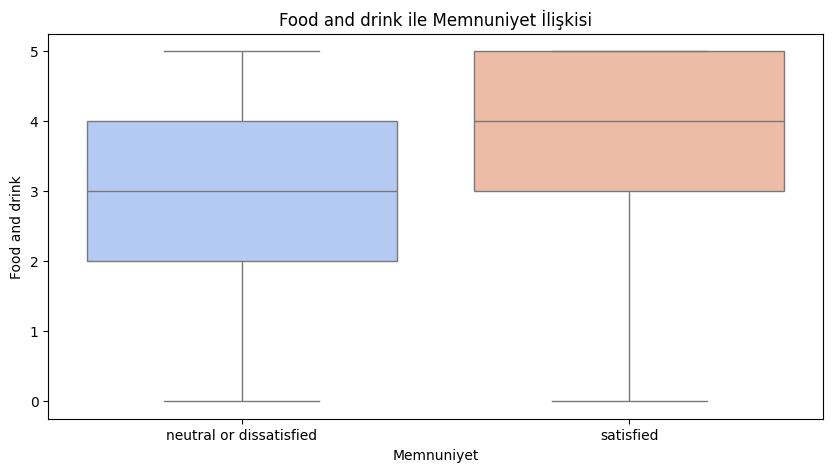

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


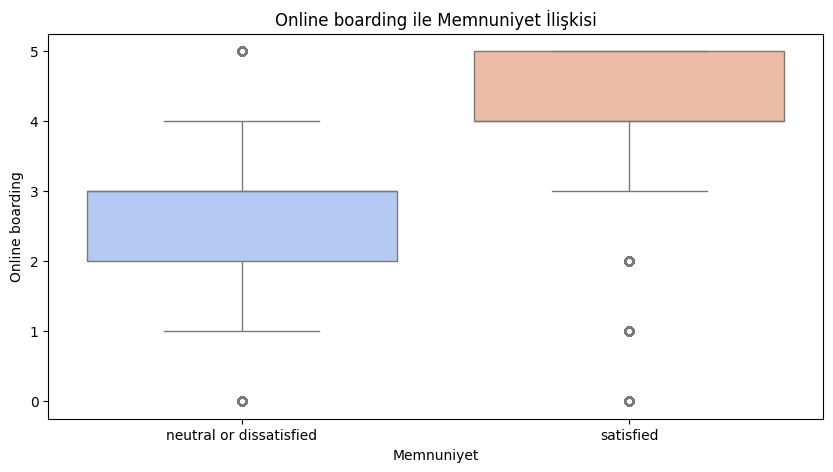

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


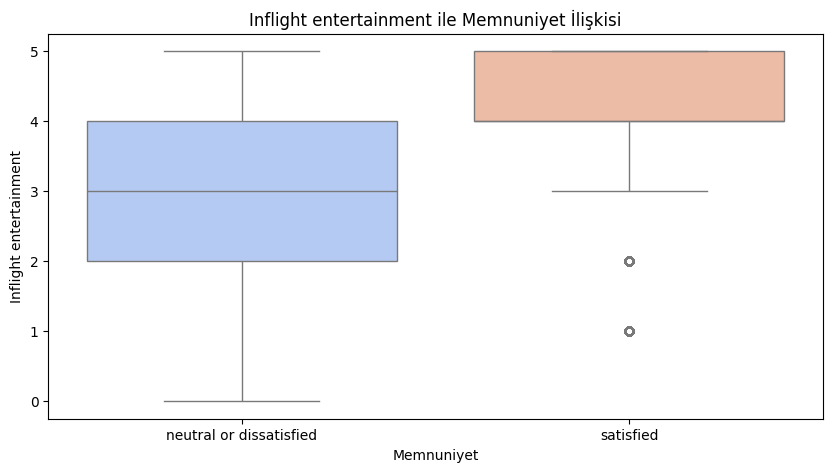

/tmp/ipython-input-43-2071018087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')


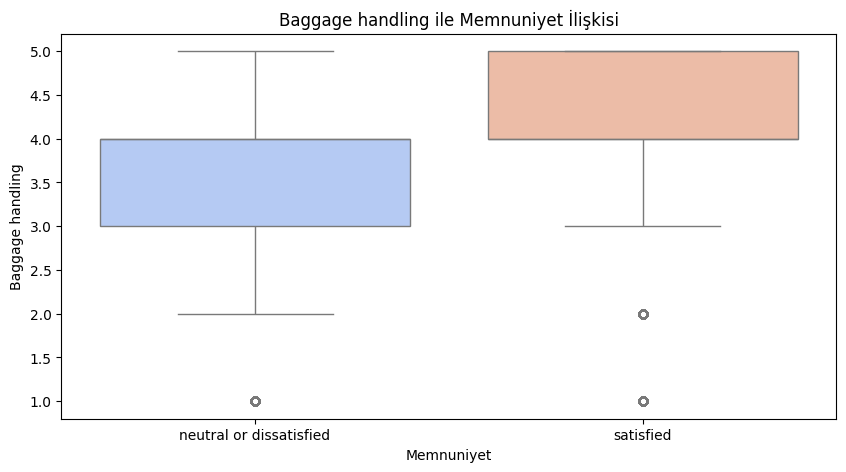

In [43]:
service_cols = [
    'Inflight wifi service', 'Seat comfort', 'Food and drink',
    'Online boarding', 'Inflight entertainment', 'Baggage handling'
]

for col in service_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='satisfaction', y=col, data=airline_df, palette='coolwarm')
    plt.title(f'{col} ile Memnuniyet İlişkisi')
    plt.xlabel('Memnuniyet')
    plt.ylabel(col)
    plt.show()


Tüm bu hizmet puanlarında memnun olan yolcuların puanları belirgin şekilde daha yüksek. Bu da memnuniyetin hizmet kalitesiyle doğrudan ilişkili olduğunu destekliyor.


--- Sayısal Değişkenler Arası Korelasyon Matrisi ---


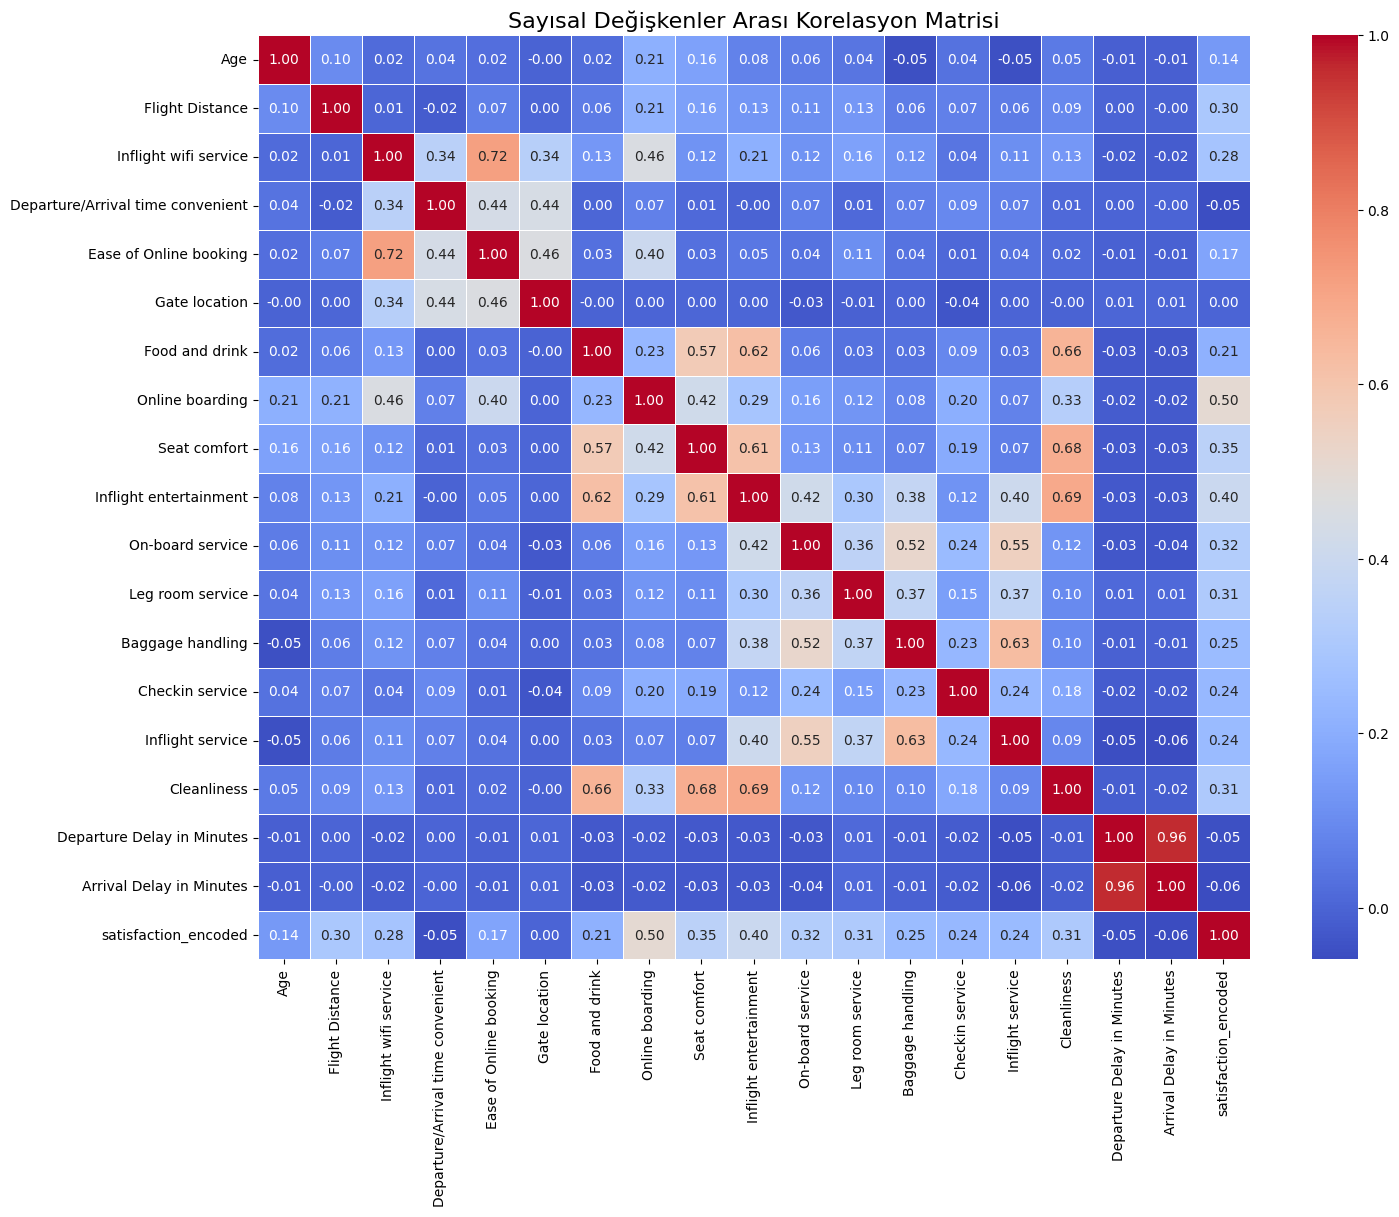

In [38]:
# --- Korelasyon Matrisi (Sadece Sayısal Veriler) ---
print("\n--- Sayısal Değişkenler Arası Korelasyon Matrisi ---")
correlation_data = airline_df.drop(columns=['id'], errors='ignore')  # 'id' yoksa hata verme
numeric_correlation_data = correlation_data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_correlation_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi', fontsize=16)
plt.show()